In [2]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors

/Users/aarshayjain/.pyenv/versions/data-processing/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
training_path = Path('../data/training/')
training_tasks = sorted(os.listdir(training_path))

In [4]:
def get_task(task_id):
    task_file = str(training_path / task_id)
    with open(task_file, 'r') as f:
        return json.load(f)

In [5]:
def plot_task(task):
    """
    Plots all train and test pairs of a specified task,
    using same color scheme as the ARC app
    """
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    num_train = len(task["train"])
    num_test = len(task["test"])
    fig, axes = plt.subplots(2, num_train+num_test, figsize=(15,8))
    task_ind = 0
    for data in task["train"]:
        axes[0, task_ind].imshow(data['input'], cmap=cmap, norm=norm)
        axes[0, task_ind].set_title('Train Input')
        axes[1, task_ind].imshow(data['output'], cmap=cmap, norm=norm)
        axes[1, task_ind].set_title('Train Output')
        task_ind += 1
    for data in task["test"]:
        axes[0, task_ind].imshow(data['input'], cmap=cmap, norm=norm)
        axes[0, task_ind].set_title('Test Input')
        axes[1, task_ind].imshow(data['output'], cmap=cmap, norm=norm)
        axes[1, task_ind].set_title('Test Output')
        task_ind += 1
    plt.tight_layout()
    plt.show()

## Go through training set and mark priors

shapes included in object priors

In [12]:
priors = {
    "object_priors": {
        1: "lines",
        2: "complete boxes",
        3: "partial boxes",
        4: "triangle",
        5: "random figures",
        6: "noise",
        7: "object contact relationship",
        8: "color change"
    },
    "goal_directedness_priors": {
        1: "move till acheive goal"
    },
    "counting_priors": {
        1: "count",
        2: "sort by size",
        3: "repeat",
        4: "logical_and_or"
    },
    "basic_geometry_priors": {
        1: "symmetry",
        2: "scaling",
        3: "a shape containing other shape",
        4: "drawing lines"
    },
    "in_out_shape": {
        1: "same",
        2: "small",
        3: "big"
    },
    "notes": ""
}
prior_types = list(priors.keys())

In [78]:
meta_filename = "prior_meta.csv"
# create a dataset to store information, when running first time
# columns = ["task_id"] + prior_types
# df = pd.DataFrame(columns=columns)
# df.to_csv(meta_filename, index=False)

# load current dataframe
df = pd.read_csv("prior_meta.csv")

In [79]:
remainig_tasks = set(training_tasks).difference(set(df["task_id"]))
len(remainig_tasks)

360

In [31]:
def run_label_iteration(df):
    task_id = remainig_tasks.pop()
    plot_task(get_task(task_id))
    
    new_row = {"task_id": task_id}
    print("Task Id: {}".format(task_id))
    for prior in prior_types:
        prior_ids = input("Input ids for {} prior: ".format(prior))
        new_row[prior] = prior_ids
    return df.append([new_row])

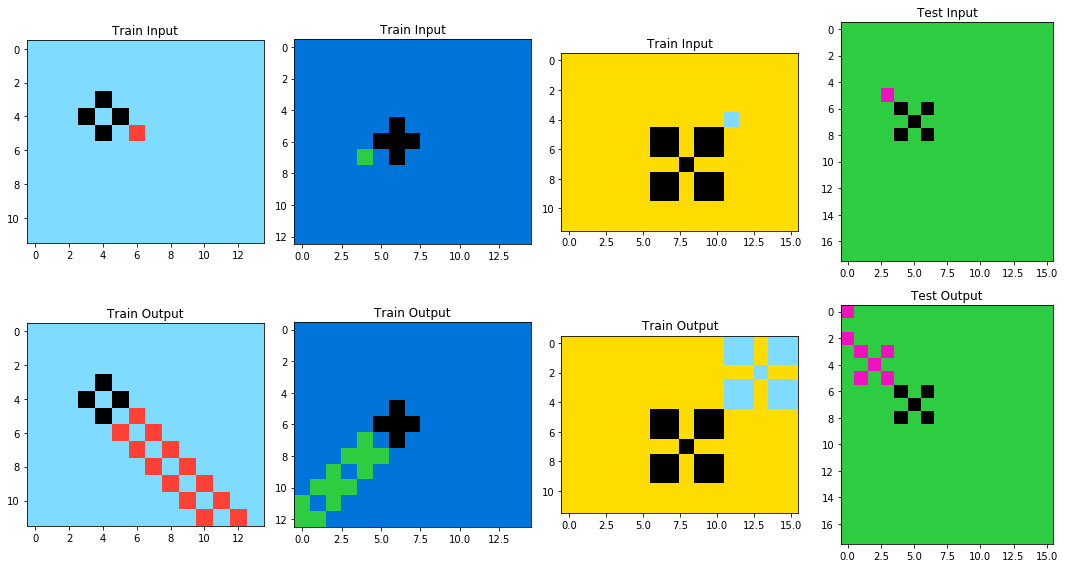

Task Id: e8dc4411.json


Input ids for object_priors prior:  5,7,8
Input ids for goal_directedness_priors prior:  1
Input ids for counting_priors prior:  3
Input ids for basic_geometry_priors prior:  
Input ids for in_out_shape prior:  1
Input ids for notes prior:  extend pattern based on direction


In [75]:
df = run_label_iteration(df)

In [76]:
df.shape[0]

40

In [77]:
df.to_csv(meta_filename, index=False)